In [9]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the data
file_path = 'to code - Copy - 2.xlsx'  # Update to your actual file path
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows of the data
print("Original Data:")
print(data.head())


Original Data:
   P_SEXE  P_GRAGE  D_ORIXCOOR  D_ORIYCOOR  D_DESTXCOOR  D_DESTYCOOR  D_HREDE
0       1       14      291500     5045500       291500      5045500      930
1       1       14      291500     5045500       291500      5045500     1030
2       1       14      291500     5045500       292500      5045500     1200
3       1       14      292500     5045500       291500      5045500     1300
4       1       14      291500     5045500       291500      5045500     1400


In [12]:
# Debug: Check column names
print("Columns in the dataset:")
print(data.columns)


Columns in the dataset:
Index(['P_SEXE', 'P_GRAGE', 'D_ORIXCOOR', 'D_ORIYCOOR', 'D_DESTXCOOR',
       'D_DESTYCOOR', 'D_HREDE'],
      dtype='object')


In [13]:
# Correct the categorical column name
categorical_columns = ['P_SEXE']  # Replace 'P_SEXE' with the correct column name
categorical_data = data[categorical_columns].copy()
scaled_data = scaled_data.drop(columns=categorical_columns)


In [14]:
# Cell 2: Normalize Data and Prepare Sequences
scalers = {}
scaled_data = data.copy()

# Normalize numeric columns
for col in scaled_data.columns:
    if pd.api.types.is_numeric_dtype(scaled_data[col]):
        scaler = MinMaxScaler()
        scaled_data[col] = scaler.fit_transform(scaled_data[[col]])
        scalers[col] = scaler

# Convert to NumPy array
scaled_array = scaled_data.values

# Create sequences for autoregression
def create_sequences(data, sequence_length=10):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(data[i + sequence_length])
    return np.array(sequences), np.array(targets)

sequence_length = 10  # Number of timesteps for prediction
X, y = create_sequences(scaled_array, sequence_length)

print(f"Shape of X (input sequences): {X.shape}")
print(f"Shape of y (targets): {y.shape}")


Shape of X (input sequences): (12165, 10, 7)
Shape of y (targets): (12165, 7)


In [15]:
# Cell 3: Define the Autoregressive Model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(sequence_length, scaled_array.shape[1])),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(scaled_array.shape[1])  # Output layer matches the number of numeric features
])

model.compile(optimizer='adam', loss='mse')
model.summary()


C:\Users\TanMeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 10, 64)              │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,911 (202.78 KB)

 Trainable params: 51,911 (202.78 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Cell 4: Train the Model
history = model.fit(
    X, y,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

print("Autoregressive model training complete.")


Epoch 1/50
343/343 - 5s - 14ms/step - loss: 0.0784 - val_loss: 0.0482
Epoch 2/50
343/343 - 2s - 6ms/step - loss: 0.0518 - val_loss: 0.0361
Epoch 3/50
343/343 - 2s - 6ms/step - loss: 0.0431 - val_loss: 0.0313
Epoch 4/50
343/343 - 2s - 6ms/step - loss: 0.0398 - val_loss: 0.0312
Epoch 5/50
343/343 - 2s - 6ms/step - loss: 0.0377 - val_loss: 0.0306
Epoch 6/50
343/343 - 2s - 6ms/step - loss: 0.0367 - val_loss: 0.0298
Epoch 7/50
343/343 - 2s - 6ms/step - loss: 0.0357 - val_loss: 0.0291
Epoch 8/50
343/343 - 2s - 6ms/step - loss: 0.0352 - val_loss: 0.0294
Epoch 9/50
343/343 - 2s - 6ms/step - loss: 0.0341 - val_loss: 0.0286
Epoch 10/50
343/343 - 2s - 7ms/step - loss: 0.0336 - val_loss: 0.0287
Epoch 11/50
343/343 - 2s - 6ms/step - loss: 0.0332 - val_loss: 0.0284
Epoch 12/50
343/343 - 2s - 7ms/step - loss: 0.0325 - val_loss: 0.0290
Epoch 13/50
343/343 - 2s - 6ms/step - loss: 0.0324 - val_loss: 0.0283
Epoch 14/50
343/343 - 2s - 7ms/step - loss: 0.0320 - val_loss: 0.0279
Epoch 15/50
343/343 - 2s - 6

In [18]:
# Cell 5: Generate Synthetic Data with Constraints
def generate_synthetic_data_with_constraints(model, seed_sequence, num_steps, scalers):
    generated_data = []
    current_sequence = seed_sequence

    for _ in range(num_steps):
        prediction = model.predict(current_sequence[np.newaxis, :, :], verbose=0)
        generated_data.append(prediction[0])
        # Update the sequence with the predicted value
        current_sequence = np.vstack([current_sequence[1:], prediction])

    # Inverse transform the generated data back to the original scale
    generated_data = np.array(generated_data)
    synthetic_data = pd.DataFrame(generated_data, columns=scaled_data.columns)

    for col in scaled_data.columns:
        synthetic_data[col] = scalers[col].inverse_transform(synthetic_data[[col]])

    # Apply constraints
    if 'P_SEXE' in synthetic_data.columns:
        synthetic_data['P_SEXE'] = synthetic_data['P_SEXE'].round().clip(1, 2).astype(int)  # Ensure 1 or 2
    if 'P_GRAGE' in synthetic_data.columns:
        synthetic_data['P_GRAGE'] = synthetic_data['P_GRAGE'].round().astype(int)  # Ensure integer

    return synthetic_data

# Seed sequence for generating synthetic data
seed_sequence = X[-1]  # Use the last sequence from training data
num_steps = 1000  # Number of steps (rows) to generate

synthetic_data = generate_synthetic_data_with_constraints(model, seed_sequence, num_steps, scalers)

print("Synthetic data generation complete with constraints.")
print(synthetic_data.head())


Synthetic data generation complete with constraints.
   P_SEXE  P_GRAGE    D_ORIXCOOR  D_ORIYCOOR   D_DESTXCOOR  D_DESTYCOOR  \
0       2        5  293085.65625   5054562.5  294181.78125    5058351.5   
1       2        6  292432.25000   5047737.5  293667.65625    5050253.0   
2       2        6  292882.15625   5051114.5  293762.28125    5051393.5   
3       2        7  292925.68750   5051132.5  293801.62500    5051044.5   
4       2        7  293171.56250   5053393.0  293843.96875    5051069.5   

       D_HREDE  
0  1427.655518  
1  1351.380981  
2  1378.256104  
3  1347.969360  
4  1350.341675  


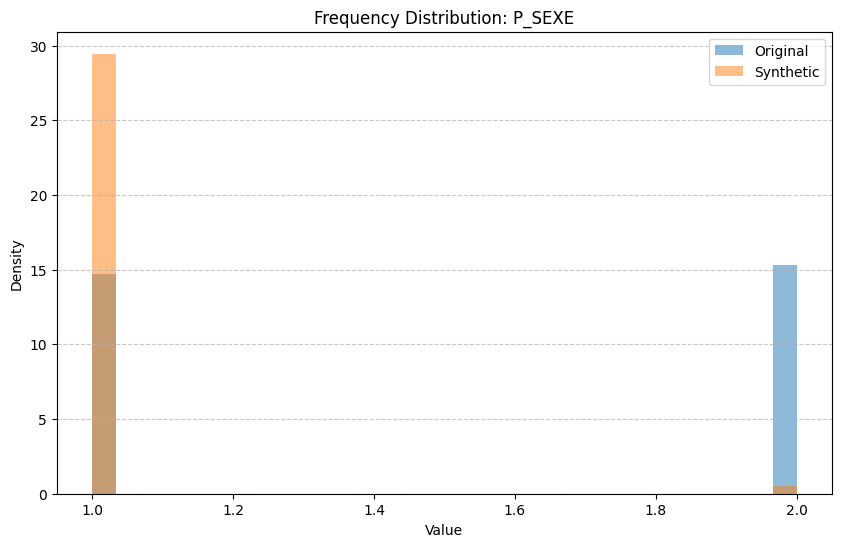

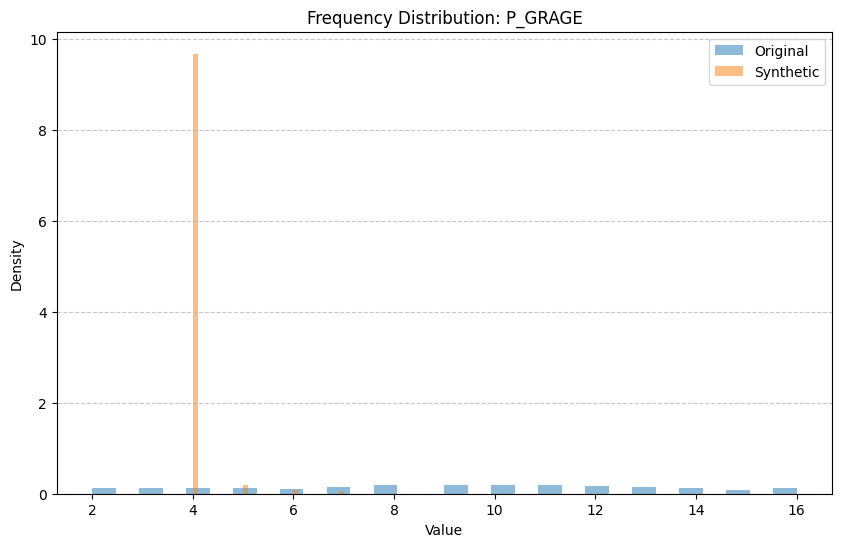

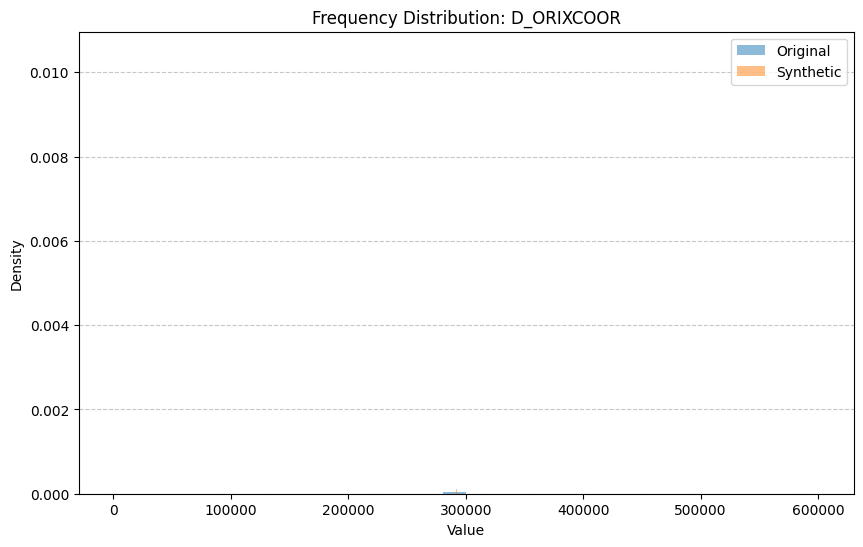

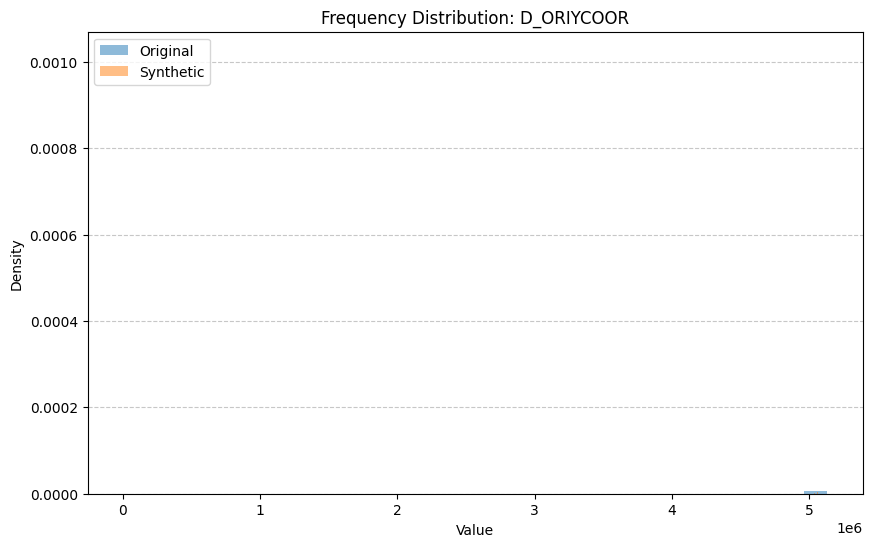

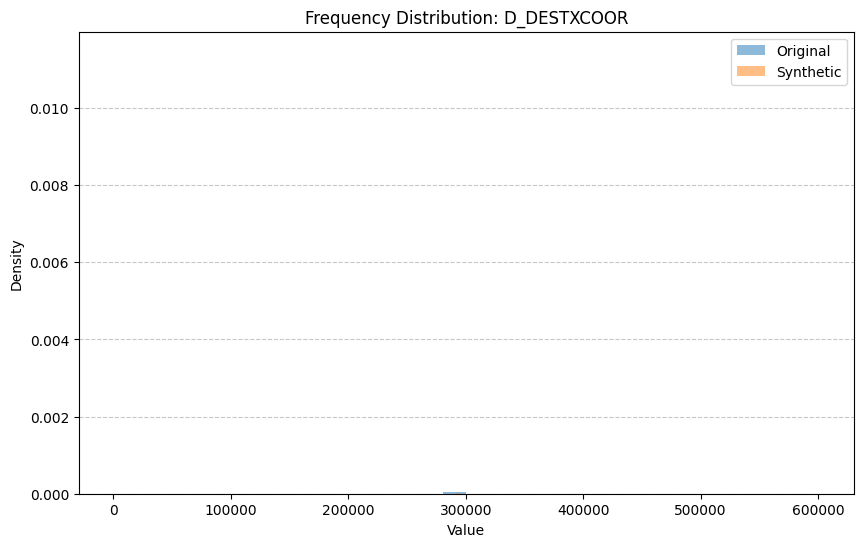

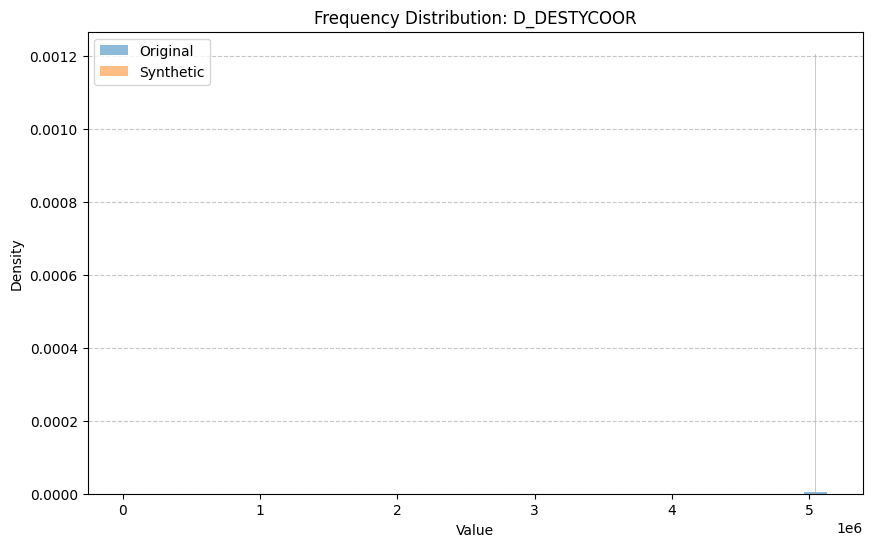

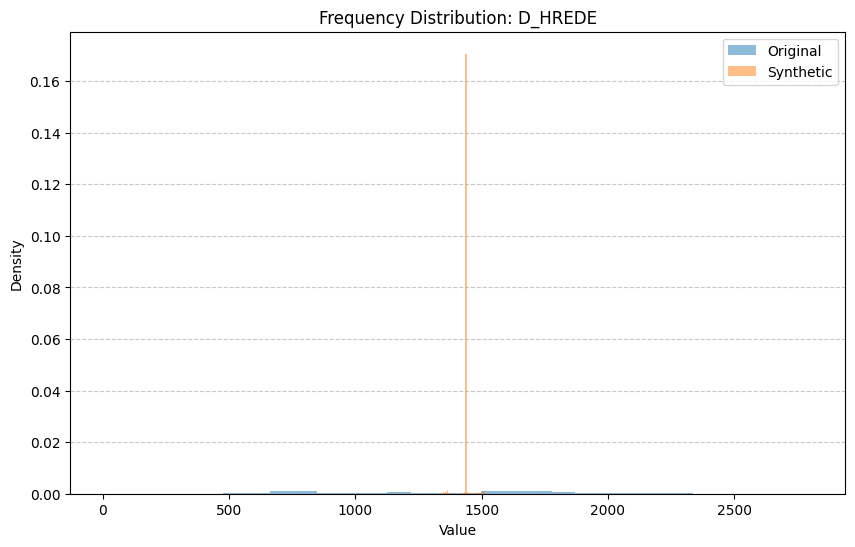

In [19]:
# Cell 6: Visualize and Compare Frequency Distributions
def plot_frequency_comparison(original, synthetic, column_name):
    """
    Plot histograms to compare frequency distributions of original and synthetic data.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(original, bins=30, alpha=0.5, label='Original', density=True)
    plt.hist(synthetic, bins=30, alpha=0.5, label='Synthetic', density=True)
    plt.title(f'Frequency Distribution: {column_name}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot comparisons for each numeric column
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        plot_frequency_comparison(data[column], synthetic_data[column], column)
